# Logistic regression

Import libraries, data, and select depndent and independent variables.

In [280]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/Heart.csv")
df['AHD'] = df['AHD'].map({'No' : 0, 'Yes' : 1})

X = df[['MaxHR']]
y = df['AHD']

In [281]:
def np_normalize(array):
    minimum = np.min(array)
    maximum = np.max(array)
    return (array - minimum) / (maximum - minimum)

X = np_normalize(X)

X.head()

,MaxHR
0,0.603053
1,0.282443
2,0.442748
3,0.885496
4,0.770992


Next visualize data: people with AHD have value 1 and people withou have value 0, the x-axis corresponds to the maximum heart rate.

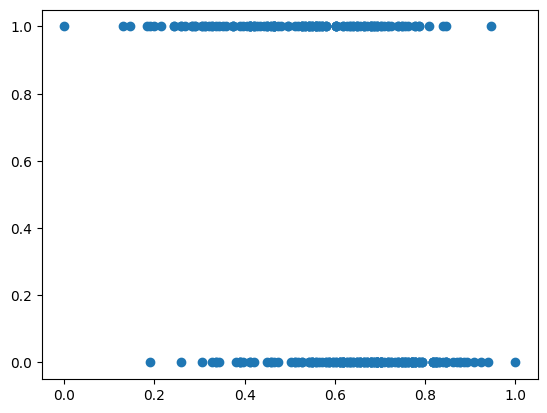

In [282]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

Now split the data into training and testing dataset and fit logistic regression from the standard model.

/home/adrian/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


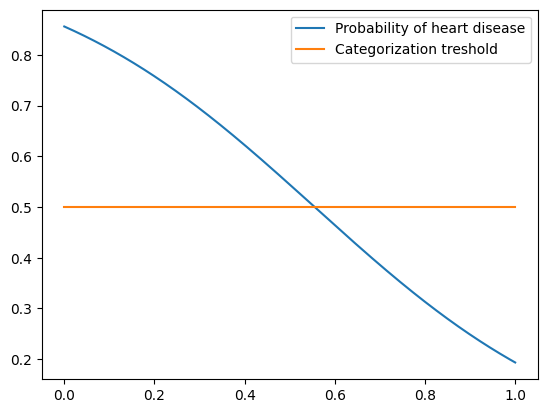

In [283]:
#Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model_sci = LogisticRegression(random_state=1).fit(X_train, y_train)

#Plot probabilities
x_lin = np.linspace(0,1,500).reshape(-1,1)
y_proba_sci = model_sci.predict_proba(x_lin)
plt.plot(x_lin, y_proba_sci[:, 1])
plt.plot(x_lin, np.array([0.5 for i in range(len(y_proba_sci[:,1]))]))
plt.legend(["Probability of heart disease", "Categorization treshold"])

## Gradient descent

To find approximation of $\beta_0, \beta_1$ we resort to a technique called gradient descent. Assume a function $F(\bm x)$ that describes a hyper-surface where $\bm x$ is a point of vector space. Now, consider $\nabla F(\bm x)$, a gradient of $F(\bm x)$, it gives the direction of fastest growth of $F(\bm x)$. Hence, $-\nabla F(x)$ gives a direction of **fastest descent**.

Therefore, we can define a sequence $\{ \bm x_n \}_{n=0}^N$ such that

$$
\bm x_{n+1} = \bm x_n - \gamma \nabla F(\bm x_n),
$$

where $\gamma$ is the step size and $N$ is the maximum number of steps. 

### Estimating parameters

Ofcouse, for our purposes we consider $\bm \beta = (\beta_0, \beta_1)$ with $Loss (p | Y)$. Then consider a sequence of vectors $\{ \bm \beta_n \}_{n=0}^N$ where $N$ is a maximum number of steps and with an intial guess $\bm \beta_0$ such that

$$
\bm \beta_{n+1} = \bm \beta_n - \gamma \nabla Loss(p | Y),
$$
where $\gamma$ is a step size. In particular, note that

$$
\nabla Loss(p | Y) = \frac{1}{N_{\text{data}}}\left( \frac{d \;l(p | Y)}{d\; \beta_0}, \frac{d \;l(p | Y)}{d\; \beta_1} \right).
$$
We have

$$
\frac{d \;l(p | Y)}{d\; \beta_m} = - \sum_{i} \left( y_i(1-p_i) -  (1-y_i)p_i\right) x_{i,m} = 0
$$

where $x_{i,m} = 1$ if $m=0$ and $x_{i,m} = x_i$ otherwise and

$$
p_i = \frac{1}{1+\exp^{-(\beta_0 + \beta_1 x_i)}}.
$$

## Implementation

First step is to implement logistic regression $p_i$ and gradient of the loss function $\nabla Loss(p | Y)$.

In [284]:
def logistic(betas, X):
    X_np = np.array(X)[:,0]
    return 1 / (1+np.exp(-(betas[0]+betas[1]* X_np)))

def grad_loss(betas, X, y):
    N = len(y)
    X_np = np.array(X)[:,0]
    y_np = np.array(y)
    p_hat = logistic(betas, X)
    der_beta_0 = -np.sum(y_np * (1 - p_hat) - (1 - y_np) * p_hat)
    der_beta_1 = -np.sum((y_np * ( 1 - p_hat ) - (1 - y_np) * p_hat ) * X_np)

    return 1/N * np.array([der_beta_0, der_beta_1])

The second step is to initiate gradient descent and refining approximation of beta's in each iteration.

In [285]:
X=X[['MaxHR']]
gamma = 0.5
init_guess = [0,0]
betas = init_guess
max_iter = 100000

print(betas)
for i in range(max_iter):
    betas = betas - gamma * grad_loss(betas, X, y)
print(betas)

[0, 0]
[ 3.24276001 -5.68685713]


Lastly let's plot logistic regression for final parameters 

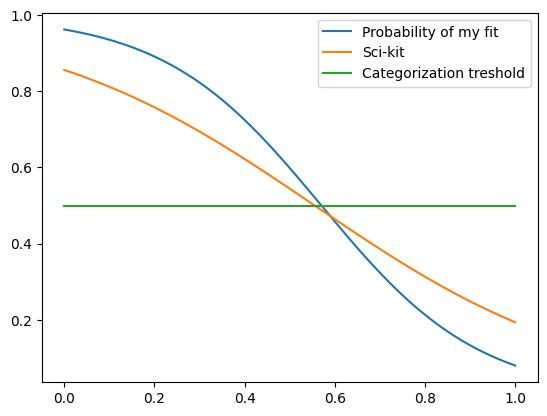

In [286]:
#Plot probabilities
x_lin = np.linspace(0,1,500).reshape(-1,1)
y_proba_me = logistic(betas,x_lin)

plt.plot(x_lin, y_proba_me)
plt.plot(x_lin, y_proba_sci[:, 1])
plt.plot(x_lin, np.array([0.5 for i in range(len(y_proba_sci[:,1]))]))
plt.legend(["Probability of my fit", "Sci-kit", "Categorization treshold"])